In [1]:
"""
requirements:
 pip install pandas janome nlpplot matplotlib plotly
"""
import pandas as pd
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

import word_wakati as wkt

In [2]:
df = pd.read_csv('datasets/jk_rs_themes.csv')
df.head()

,年度,学科／研究科,研究室,学籍番号,賞,氏名,要旨,題目
0,H17,情報科学科,相研,02JK001,NaN,青木雄司,NaN,WEBページにおけるユーザビリティの追及
1,H17,情報科学科,松永研,02JK002,NaN,青柳茂樹,NaN,安全運転管理教育システム(ASSIST)における複数カメラ使用での交通事故防止対策
2,H17,情報科学科,宮崎研,02JK003,NaN,芦刈綾子,NaN,電子透かしの体制に関する検討 -加重平均フィルタ・メディアンフィルタの場合-
3,H17,情報科学科,成研,02JK005,NaN,足達祐治,NaN,対面教育を支援するためのウェブ助言システム
4,H17,情報科学科,石田健研,02JK006,NaN,安部弘治,NaN,衛星通信検討のための気象データの解析-2002年のデータ解析-


In [3]:
years = df["年度"].unique()
y, d = 5, 2 # loop for every 'y' years
for i in range(0,len(years)-y, d):
    print(years[i],years[i+y],)

H17 H22
H19 H24
H21 H26
H23 H28
H25 H30
H27 R02
H29 R04


In [4]:
len(df)

2148

In [5]:
fake_lab={'成研': 'A研', '石田健研': 'B研', '仲研': 'C研', '澤田研': 'D研', 
          '稲永研': 'E研', '合志研': 'F研', '米元研': 'G研', '朝廣研': 'H研', 
          '下川研': 'M研', '安部研': 'N研', 'アプドゥハン研': 'P研', '田中研': 'Q研', '安武研': 'R研'}
print(fake_lab.values())

dict_values(['A研', 'B研', 'C研', 'D研', 'E研', 'F研', 'G研', 'H研', 'M研', 'N研', 'P研', 'Q研', 'R研'])


# various graphs
- themeriver graph (mathplotlib.stackplots)
- knowledge structure graph

In [6]:
import importlib
importlib.reload(wkt)
mecab = wkt.create_parser(worker='mecab', parts_of_speech=['名詞','動詞','形容詞'])
janome = wkt.create_parser(worker='janome', parts_of_speech=['名詞','動詞','形容詞'])
text = '拡張現実感のための実物体の奥行きを考慮した陰面消去'
rs_j = wkt.word_seq(text,parser=janome)
rs_m = wkt.word_seq(text,parser=mecab)
print(rs_j)
print(rs_m)

['拡張', '現実', '感', 'ため', '物体', '奥行き', '考慮', 'する', '陰', '面', '消去']
['拡張', '現実', '感', 'ため', '物体', '奥行き', '考慮', 'スル', '陰', '面', '消去']


In [7]:
text = '研究室配属における学生の研究室に対する理解を深める情報共有システム'
rs_j = wkt.word_seq(text,parser=janome)
rs_m = wkt.word_seq(text,parser=mecab)
print(rs_j)
print(rs_m)

['研究', '室', '配属', '学生', '研究', '室', '理解', '深める', '情報', '共有', 'システム']
['研究', '配属', 'オク', '学生', '研究', 'タイスル', '理解', 'フカメル', '情報', '共有', 'システム']


In [8]:
text ='人感センサーを利用した乗降客数計測Androidアプリケーションの開発'
rs_j = wkt.word_seq(text,parser=janome)
rs_m = wkt.word_seq(text,parser=mecab)
print(rs_j)
print(rs_m)

['人', '感', 'センサー', '利用', 'する', '乗降', '客数', '計測', 'Android', 'アプリケーション', '開発']
['人感', 'センサー', '利用', 'スル', '乗降', '客数', '計測', 'Android', 'アプリケーション', '開発']


In [9]:
%matplotlib inline
import importlib
importlib.reload(wkt)

targets = ['動詞', '名詞', '形容詞'] #評価対象にする品詞
ignores = ['－', '～', '-', '(', ')', '---', '.','する','ため','用いる','有する','用','使う'] #無視する記号や単語
mecab  = wkt.create_parser(worker='mecab',  parts_of_speech=targets, stop_words=ignores)

In [10]:
import collections

def ngram(words, n):
    lists = []
    m = len(words)
    if m > n:
        for i in range(n):
            lists += [ words[i:m-i+n] ]
        glist = list(zip(*lists))
    else:
        glist = words
        
    return [" ".join(g) for g in glist]

ngram(['a','b', 'c', 'd'], 2)

['a b', 'b c', 'c d']

In [11]:
def topk(df, i, j, topn, lab="研", stopwords=0):
    y1, y2 = years[i],years[j]
    df1 = None
    df1 = df[(df['研究室'].str.contains(lab)) & (df['年度']>=y1) & (df['年度']<=y2)]
    titles =  [ t[0] for t in df1.loc[:,['題目']].values]
    freq = collections.defaultdict(int)
    for text in titles:
        words = wkt.word_seq(text, parser=mecab)
        glist = ngram(words, 2)
#         print(glist)
        for g in glist:
            freq[g] += 1 
    freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)   
    return freq[stopwords:topn+stopwords]

In [12]:
k, s, b = 60, 2, '研' 
d = 3

i = 0
top10 = topk(df, i, i+d, k,lab=b, stopwords=s)
top1 = dict(top10)
print(years[i],' ~ ',years[i+d])
print(top10)

i = 7
top10 = topk(df, i, i+d, k,lab=b, stopwords=s)
top2 = dict(top10)
print(years[i],' ~ ',years[i+d])
print(top10)

i=14
top10 = topk(df, i,i+d,k,lab=b,stopwords=s)
top3 = dict(top10)
print(years[i],' ~ ',years[i+d])
print(top10)


H17  ~  H20
[('支援 システム', 26), ('運転 管理', 21), ('管理 教育', 21), ('教育 システム', 21), ('管理 システム', 21), ('利用 スル', 21), ('システム ASSIST', 20), ('ASSIST オク', 19), ('カンスル 研究', 17), ('教育 支援', 16), ('ドライビング シミュレータ', 16), ('システム 構築', 16), ('交通 標識', 15), ('ソフトウェア 開発', 14), ('オン ライン', 13), ('セマンティック グリッド', 12), ('問題 タイスル', 11), ('システム 設計', 11), ('携帯 電話', 11), ('支援 ツール', 10), ('衛星 通信', 9), ('タイスル メタ', 9), ('メタ ヒューリスティクス', 9), ('ヒューリスティクス 実験', 9), ('実験 解析', 9), ('開発 演習', 9), ('システム 試作', 9), ('法 ヨル', 9), ('卒業 研究', 9), ('標識 認識', 9), ('電子 透かし', 8), ('データ 解析', 8), ('ツール 開発', 8), ('組合せ 問題', 8), ('記録 システム', 8), ('クラスタ コンピューティング', 8), ('システム オク', 8), ('電磁 伝搬', 8), ('機能 開発', 8), ('情報 科学', 8), ('科学 部', 8), ('運転 助言', 8), ('助言 検査', 8), ('道路 標識', 8), ('性能 評価', 7), ('標識 抽出', 7), ('サーバ 構築', 7), ('設計 開発', 7), ('コンピューティング 教育', 7), ('車 椅子', 7), ('KM 式', 7), ('式 安全', 7), ('検索 システム', 6), ('システム 作成', 6), ('講義 記録', 6), ('伝搬 シミュレータ', 6), ('試作 評価', 6), ('認識 研究', 6), ('方式 研究', 6), ('化学 反応', 5)]
H24  ~  H27
[('利用 スル', 17), ('アプリケーシ

In [13]:
# long-term popular
common = top1.keys() & top2.keys() & top3.keys()

#short-term popular
com12 = top1.keys() & top2.keys() - common 
com13 = top1.keys() & top3.keys() - common
com23 = top2.keys() & top3.keys() - common
print("common\n",common)
print("com12\n",com12)
print("com13\n",com13)
print("com23\n",com23)


common
 {'システム ASSIST', 'システム 試作', '運転 管理', '利用 スル', '教育 システム', 'ドライビング シミュレータ', '管理 システム', '管理 教育', 'ASSIST オク', '機能 開発'}
com12
 {'カンスル 研究', 'オン ライン', '設計 開発', '科学 部', '電磁 伝搬', '情報 科学', '支援 ツール', 'ツール 開発', '伝搬 シミュレータ', 'システム 設計'}
com13
 {'問題 タイスル', 'システム オク', '支援 システム', '性能 評価'}
com23
 {'教材 開発', '安全 運転', 'シミュレータ 開発', '教材 作成', '学習 支援'}


In [14]:
only1 = top1.keys() - top2.keys() - top3.keys()
only2 = top2.keys() - top1.keys() - top3.keys()
only3 = top3.keys() - top1.keys() - top2.keys()
print("only1\n",only1)
print("only2\n",only2)
print("only3\n",only3)

only1
 {'データ 解析', '交通 標識', '検索 システム', '車 椅子', 'メタ ヒューリスティクス', '記録 システム', '開発 演習', '方式 研究', '式 安全', 'システム 構築', '認識 研究', '道路 標識', 'タイスル メタ', '教育 支援', '化学 反応', '講義 記録', 'セマンティック グリッド', 'ソフトウェア 開発', 'クラスタ コンピューティング', 'KM 式', '衛星 通信', 'ヒューリスティクス 実験', 'システム 作成', '法 ヨル', '運転 助言', 'コンピューティング 教育', '助言 検査', '電子 透かし', '標識 抽出', 'サーバ 構築', '実験 解析', '試作 評価', '携帯 電話', '組合せ 問題', '卒業 研究', '標識 認識'}
only2
 {'アプリ 開発', '計算 機', '電気 自動', '時間 割', 'アプリケーション 開発', '九州 産業', 'ET ロボコン', 'Android アプリケーション', 'Unity モチイル', 'モデル 計算', '生成 システム', '電力 削減', '家庭 オク', '大学 情報', '線形 代数', '情報 モチイル', '教育 教材', '消費 電力', 'ライン テスト', '水中 集魚', 'ツール 作成', 'ハイブリッド クラウド', '考慮 スル', '支援 アプリケーション', '作成 支援', 'CUDA モチイル', '位置 情報', '産業 大学', 'Web アプリケーション', '割 作成', '機 KERNEL', '遺伝 アルゴリズム', 'Android 端末', 'KERNEL 更新', '情報 共有'}
only3
 {'セル オートマトン', '計算 オフ', 'PC モチイル', '学習 モチイル', 'FDTD 法', '睡眠 時', '誘電 率', '地域 公共', 'モチイル 実験', '交通 基盤', '誘電 体', 'タイスル アルゴリズム', '年度 貸与', 'データ モチイル', 'エッジ コンピューティング', '演習 課題', 'アルゴリズム 性能', '支援 アプリ', 'システム 改良', '留年 退学', 'オートマ

In [15]:
import random

topics = [
# common
     'ドライビング シミュレータ', '機能 開発', '安全運転 管理教育', 'システム 試作'
    ,'マイクロ波 誘電体', '車 エージェント', '地域 公共','データ 作成', 'ゲート パルス'
     ,'電磁波 伝搬', '設計 開発', 'システム 設計','性能 評価', 'データ 解析'
    ,'計算機 KERNEL','イベント 履歴', '計画 方式', '簡易 脳波計'
     ,'教材 作成', '水中 集魚灯','走行 体', 'Web アプリケーション', 'FDTD 法'
    ,'衛星 通信', '標識 抽出','マルチ ビーム','業務 プロセス'
]

base = topics

# random.shuffle(base)

k, s, b = 60, 1, '研' 
d = 3
x = years[d:len(years)]
y = []
for i in range(len(years)-d):
    print(years[i],'-', years[i + d])
    freq = {key:0 for key in base}
    top_k = topk(df,i, i+d, k,lab=b, stopwords=s)
    for key,val in top_k:
        if key in base:
            freq[key] = val
#     print(freq)
    y += [freq.values()]
print(x)
print(y[0:2])

H17 - H20
H18 - H21
H19 - H22
H20 - H23
H21 - H24
H22 - H25
H23 - H26
H24 - H27
H25 - H28
H26 - H29
H27 - H30
H28 - R01
H29 - R02
H30 - R03
R01 - R04
['H20' 'H21' 'H22' 'H23' 'H24' 'H25' 'H26' 'H27' 'H28' 'H29' 'H30' 'R01'
 'R02' 'R03' 'R04']
[dict_values([16, 8, 0, 9, 0, 0, 0, 0, 0, 0, 7, 11, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 7, 0, 0]), dict_values([13, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0])]


In [16]:
print(list(zip(base,y[0])))
# print(list(zip(base,y[1])))
# print(list(zip(base,y[2])))

[('ドライビング シミュレータ', 16), ('機能 開発', 8), ('安全運転 管理教育', 0), ('システム 試作', 9), ('マイクロ波 誘電体', 0), ('車 エージェント', 0), ('地域 公共', 0), ('データ 作成', 0), ('ゲート パルス', 0), ('電磁波 伝搬', 0), ('設計 開発', 7), ('システム 設計', 11), ('性能 評価', 7), ('データ 解析', 8), ('計算機 KERNEL', 0), ('イベント 履歴', 0), ('計画 方式', 0), ('簡易 脳波計', 0), ('教材 作成', 0), ('水中 集魚灯', 0), ('走行 体', 0), ('Web アプリケーション', 0), ('FDTD 法', 0), ('衛星 通信', 9), ('標識 抽出', 7), ('マルチ ビーム', 0), ('業務 プロセス', 0)]


In [17]:
print(len(base))
print(len(y[0]))
# collections.Counter(base).most_common(1) 

27
27


In [18]:
from  matplotlib import rcParams
rcParams['font.family'] = 'Noto Sans CJK JP'

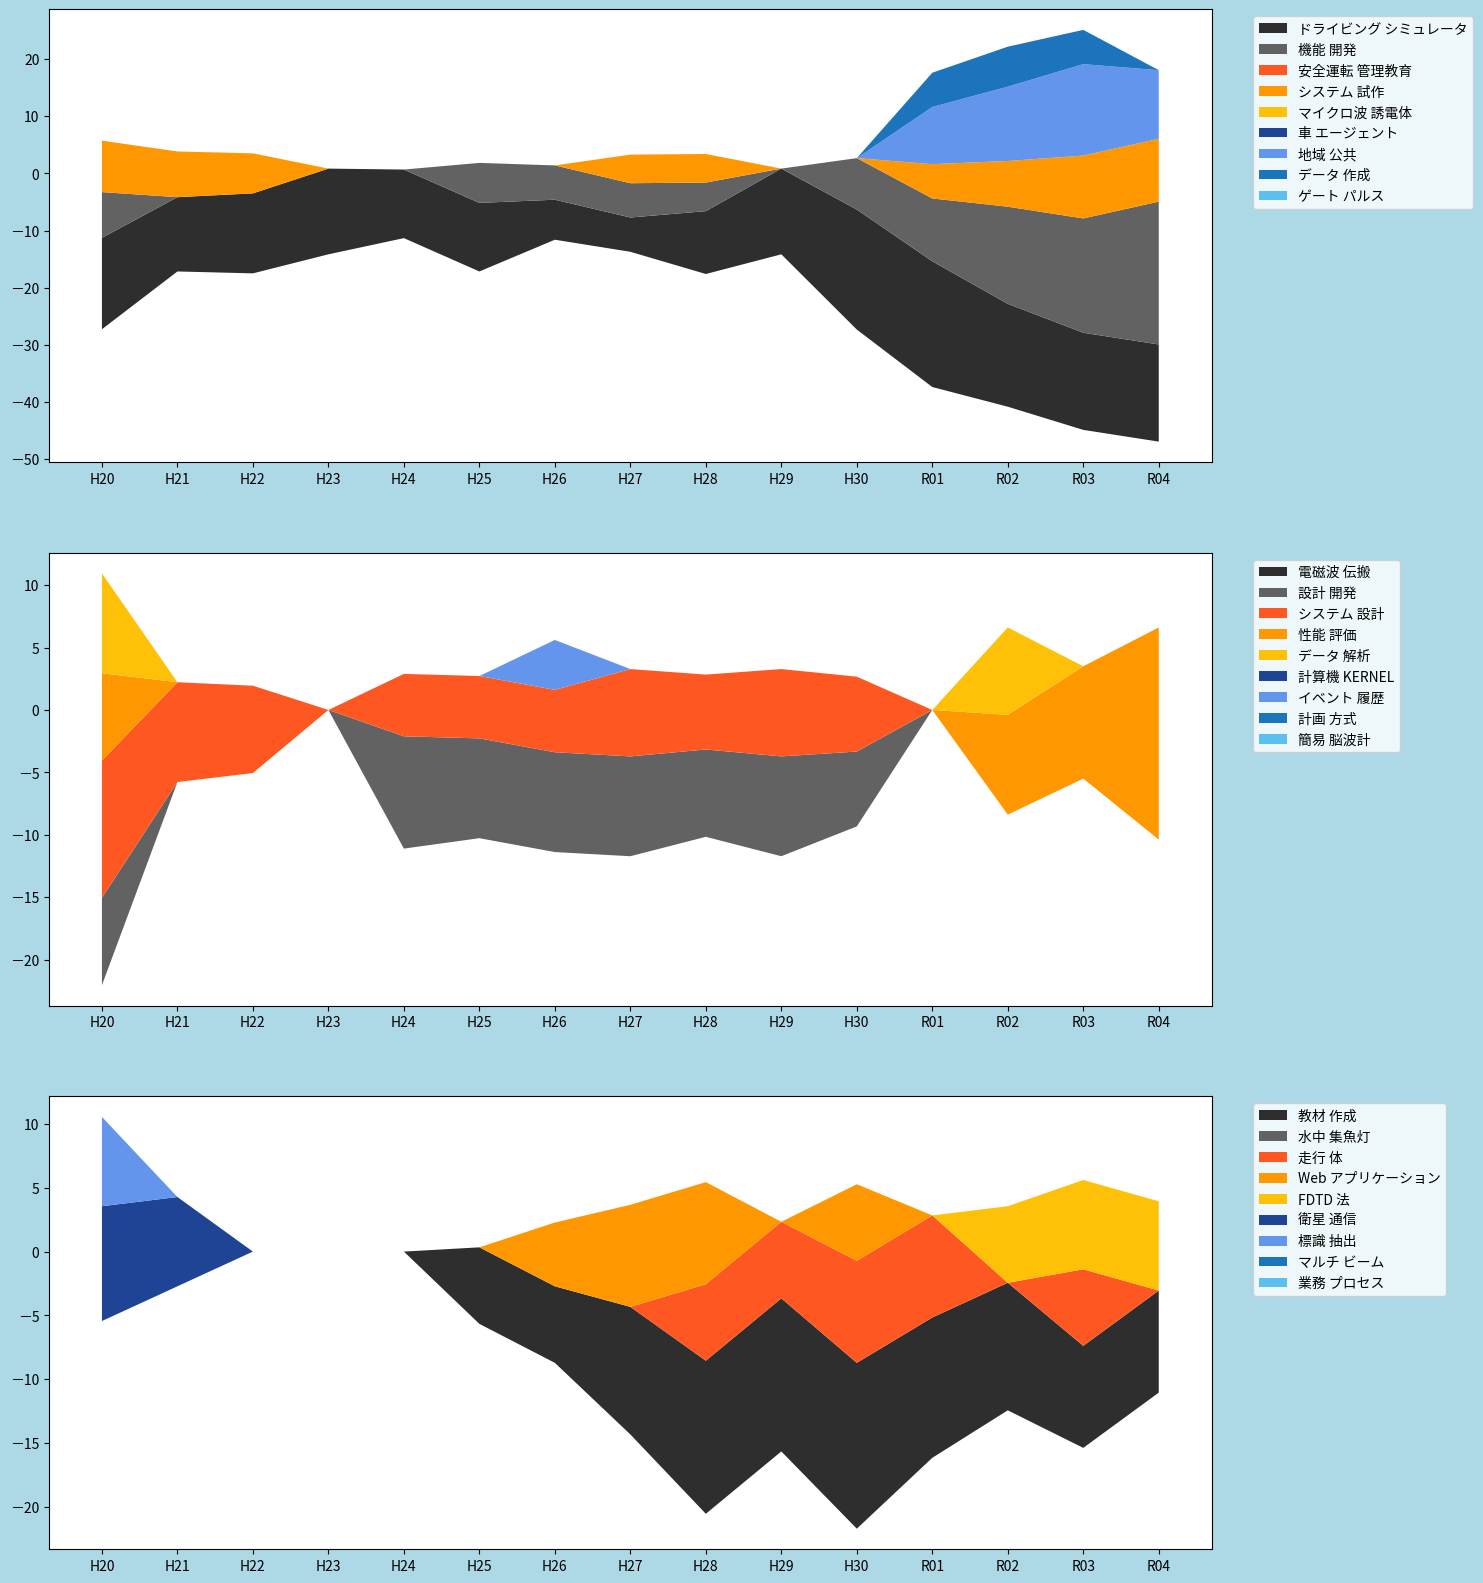

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[15,20], facecolor='lightblue')
y_axis = [ [list(t)[i] for t in y ] for i,_ in enumerate(base)]

ax = []
n_fig = 3

for i in range(n_fig):
    ax.append(fig.add_subplot(n_fig,1,i+1) )

d = 9

# Color patterns for keywords in stackplot
# cf. https://saruwakakun.com/design/gallery/palette

# pattern 1: system default
colors1 = None  # default colors

# pattern 2: dark
colors2=['#2E2E2E', '#626262', '#FF5722', '#FF9800', '#FFC107', 
        '#204495', '#6495ED', '#1C75BC', '#5CC0EF']

# pattern 3 : light
colors3=['#F6E5D7', '#73D0C2', '#ED8D49', '#FFC530', '#978D86',
        '#E85A70', '#4EA1D5', '#AAA5D1', '#454552']

for i in range(n_fig):
    labels = list(base)[i*d:(i+1)*d]
    ax[i].stackplot(x, *(y_axis[i*d:(i+1)*d]), labels=labels, colors=colors2, baseline='wiggle')
    # ax[i].legend(loc='best')
    ax[i].legend(bbox_to_anchor=(1.03, 1.0), loc='upper left')
    # ax[i].set_xlabel('年度')
    # ax[i].set_ylabel('使用頻度')

plt.show()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('datasets/jk_rs_themes.csv')
i, j, lab = 0, 10, '研'
y1, y2 = years[i],years[j]
df1 = None
df1 = df[(df['年度']>=y1) & (df['年度']<=y2)]
titles =  [ t[0] for t in df1.loc[:,['題目']].values]
themes = []
for text in titles:
    words = wkt.word_seq(text, parser=mecab)
    themes += [" ".join(words)]
# print(themes)

model = TfidfVectorizer(ngram_range=(1, 1))
X = model.fit_transform(themes)

# When sklearn.__version__ <= 0.24.x use get_feature_names() 
# When sklearn.__version__ >= 1.0.x use get_feature_names_out() 
df_series = pd.DataFrame(X.toarray(), columns=model.get_feature_names_out())

keywords = df_series.max().sort_values(ascending=False)

keywords.head(10)

車両        0.847526
配球        0.829159
方程        0.825923
ヨミトル      0.822257
rfid      0.813604
似顔        0.802697
ウェブサイト    0.800494
バックアップ    0.789854
音楽        0.788945
kernel    0.779354
dtype: float64

In [22]:
print(len(keywords))
for i, v in keywords.items():
    print(f'{str(i).upper()}\t{v:.3f}')
    if v < 0.8:
        break

1794
車両	0.848
配球	0.829
方程	0.826
ヨミトル	0.822
RFID	0.814
似顔	0.803
ウェブサイト	0.800
バックアップ	0.790
